In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import time

In [2]:
# Load the dataset
df = pd.read_excel('Concrete_Data.xls')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [6]:
# Splitting features (X) and target (y)
X = df.drop(columns=['Concrete compressive strength(MPa, megapascals) '])
y = df['Concrete compressive strength(MPa, megapascals) ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# NN from Scratch
class NN:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights randomly
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros(output_size)

    def relu(self, z):
        return np.maximum(0, z)

    def relu_derivative(self, z):
        return z > 0

    def forward(self, X):
        """Forward pass"""
        self.z1 = X.dot(self.W1) + self.b1
        self.a1 = self.relu(self.z1)
        self.z2 = self.a1.dot(self.W2) + self.b2
        return self.z2  # Output (linear activation)

    def backward(self, X, y, y_hat, alpha):
        """Backward pass (backpropagation)"""
        m = len(y)

        # Gradient of loss w.r.t output layer
        dz2 = y_hat - y.reshape(-1, 1)

        # Gradients for W2 and b2
        dW2 = (1/m) * np.dot(self.a1.T, dz2)
        db2 = (1/m) * np.sum(dz2, axis=0)

        # Gradient of hidden layer
        dz1 = np.dot(dz2, self.W2.T) * self.relu_derivative(self.a1)

        # Gradients for W1 and b1
        dW1 = (1/m) * np.dot(X.T, dz1)
        db1 = (1/m) * np.sum(dz1, axis=0)

        # Update weights and biases
        self.W2 -= alpha * dW2
        self.b2 -= alpha * db2
        self.W1 -= alpha * dW1
        self.b1 -= alpha * db1

    def train(self, X, y, epochs=1000, alpha=0.01):
        cost_values = []
        y = np.array(y).reshape(-1, 1)  # Convert y to a NumPy array and reshape
        for epoch in range(epochs):
            y_hat = self.forward(X)
            cost = np.mean((y_hat - y) ** 2)
            cost_values.append(cost)
            self.backward(X, y, y_hat, alpha)
        return cost_values

In [9]:
# Initialize NN parameters
input_size = X_train_scaled.shape[1]
hidden_size = 10  # Hidden layer size
output_size = 1   # Output size (regression)

# Train NN from scratch
nn_scratch = NN(input_size, hidden_size, output_size)

# Record time
start_time = time.time()
cost_values_scratch = nn_scratch.train(X_train_scaled, y_train, epochs=1000, alpha=0.01)
end_time = time.time()
time_scratch = end_time - start_time

# Predictions
y_test_pred_scratch = nn_scratch.forward(X_test_scaled)

Scratch Model - Test MSE: 36.0192
Scratch Model - Test R²: 0.8602
Scratch Model - Training Time: 0.14 seconds


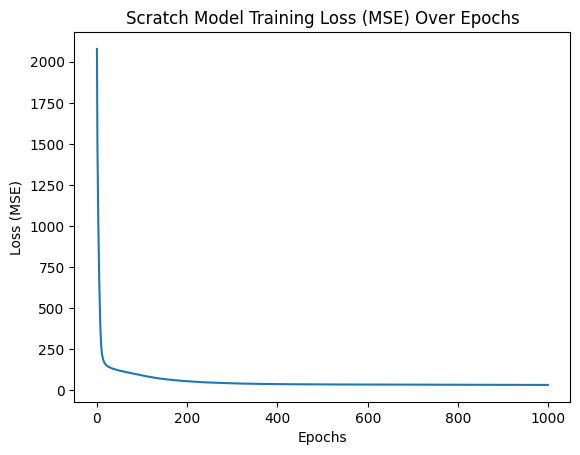

In [10]:
# Evaluation of Scratch Model
mse_test_scratch = mean_squared_error(y_test, y_test_pred_scratch)
r2_test_scratch = r2_score(y_test, y_test_pred_scratch)

# Results
print(f"Scratch Model - Test MSE: {mse_test_scratch:.4f}")
print(f"Scratch Model - Test R²: {r2_test_scratch:.4f}")
print(f"Scratch Model - Training Time: {time_scratch:.2f} seconds")

# Plots
plt.plot(cost_values_scratch)
plt.title('Scratch Model Training Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

In [11]:
# NN with Keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam

In [12]:
# Keras model
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')

# Record training time
start_time_keras = time.time()

# Train the Keras model
history_keras = model.fit(X_train_scaled, y_train, epochs=1000, verbose=0)

end_time_keras = time.time()
time_keras = end_time_keras - start_time_keras

# Predict on test data using Keras model
y_test_pred_keras = model.predict(X_test_scaled)

7/7 [==============================] - 0s 582us/step


Keras Model - Test MSE: 36.6451
Keras Model - Test R²: 0.8578
Keras Model - Training Time: 11.68 seconds


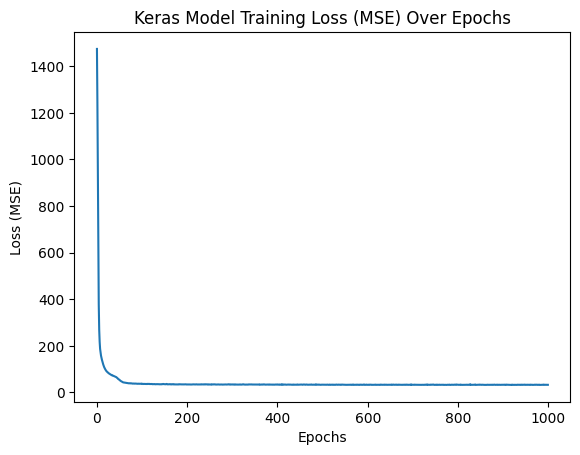

In [13]:
# Evaluation of Keras Model
mse_test_keras = mean_squared_error(y_test, y_test_pred_keras)
r2_test_keras = r2_score(y_test, y_test_pred_keras)

# Results
print(f"Keras Model - Test MSE: {mse_test_keras:.4f}")
print(f"Keras Model - Test R²: {r2_test_keras:.4f}")
print(f"Keras Model - Training Time: {time_keras:.2f} seconds")

# Plots
plt.plot(history_keras.history['loss'])
plt.title('Keras Model Training Loss (MSE) Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.show()

In [14]:
# Comparison

print("\nComparison:")
print(f"Scratch Model - MSE: {mse_test_scratch:.4f}, R²: {r2_test_scratch:.4f}, Time: {time_scratch:.2f} seconds")
print(f"Keras Model   - MSE: {mse_test_keras:.4f}, R²: {r2_test_keras:.4f}, Time: {time_keras:.2f} seconds")


Comparison:
Scratch Model - MSE: 36.0192, R²: 0.8602, Time: 0.14 seconds
Keras Model   - MSE: 36.6451, R²: 0.8578, Time: 11.68 seconds
